In [14]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from aligner_v3 import Aligner

In [16]:
stack = 'CHATM3'

# 3N-4N complex

In [29]:
stack_m_spec = dict(name='atlasV6',
                   vol_type='score',
#                    structure=structure_m,
                    resolution='10.0um'
                   )

stack_f_spec = dict(name=stack,
                   vol_type='score',
                   detector_id=799,
#                    structure=convert_to_original_name(structure_m),
                    resolution='10.0um'
                   )

local_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=27)

In [30]:
local_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=local_alignment_spec,
structures_m=['3N_L', '4N_L'],
fixed_structures_are_sided=True,
fixed_surroundings_have_positive_value=False,
                                                           fixed_use_surround=False
)

upstream_warp_id                                                               None
transform_type                                                                rigid
terminate_thresh                                                                NaN
grad_computation_sample_number                                                10000
grid_search_sample_number                                                       NaN
std_tx_um                                                                       NaN
std_ty_um                                                                       NaN
std_tz_um                                                                       NaN
std_theta_xy_degree                                                             NaN
surround_weight                                                             inverse
regularization_weight                                                             0
comment                           local reg with surr with global transform 

Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['3N_L', '3N_L_surround_200um', '4N_L', '4N_L_surround_200um'].
Prior structure/index map not found. Generating a new one.
Loaded fixed volumes: ['3N_L', '4N_L'].
Computing structure sizes: 0.00 s


In [31]:
aligner = Aligner(local_aligner_parameters['volume_fixed'], 
                  local_aligner_parameters['volume_moving'], 
                  labelIndexMap_m2f=local_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [32]:
T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol = bp.unpack_ndarray_file('/home/yuncong/' + stack_f_spec['name'] + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp')

aligner.set_initial_transform(params=T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.flatten())

aligner.set_centroid(centroid_m='structure_centroid', 
                     centroid_f='centroid_m',
                    indices_m=[local_aligner_parameters['structure_to_label_moving']['3N_L']])

aligner.compute_gradient(smooth_first=True)

Set initial transform to [ 9.87580130e-01  1.57126095e-01  0.00000000e+00  1.26509838e+03
 -1.57126095e-01  9.87580130e-01  0.00000000e+00  4.90968802e+02
  0.00000000e+00  0.00000000e+00  1.00000000e+00  4.60000000e+02].
centroid_m: [1112.13828485  406.97176141  446.05433297], centroid_f: [1112.13828485  406.97176141  446.05433297]
indices_f: set([1, 2])


In [33]:
aligner.set_label_weights(label_weights=local_aligner_parameters['label_weights_m'])

In [34]:
_, _ = aligner.optimize(tf_type=local_aligner_parameters['transform_type'], 
#                             max_iter_num=0,
                             max_iter_num=5000,
                             history_len=100, 
                             terminate_thresh_trans=.01,
                        terminate_thresh_rot=0.02,
                             full_lr=np.array([1,1,1,.01,.01,.01]),
                            )


iteration 0
Norm of gradient (translation) = 1.732051
Norm of gradient (rotation) = 1.732051
around x=0.57; around y=-0.58; around z=0.57
step: 0.11 seconds
current score: 0.001580
new_T: [ 0.9999     -0.0100495  -0.0099495  -0.99993333  0.0099495   0.9999
 -0.0100495  -1.00996642  0.0100495   0.0099495   0.9999      0.98996692]
det: 1.00

iteration 1
Norm of gradient (translation) = 1.140453
Norm of gradient (rotation) = 1.397046
around x=0.95; around y=-1.00; around z=1.13
step: 0.11 seconds
current score: 0.002089
new_T: [ 0.99965381 -0.01997195 -0.01712844 -1.67492979  0.0196826   0.99966346
 -0.01689839 -0.48329008  0.01746017  0.01655541  0.99971049  1.71490025]
det: 1.00

iteration 2
Norm of gradient (translation) = 0.844689
Norm of gradient (rotation) = 1.033089
around x=1.28; around y=-1.35; around z=1.47
step: 0.11 seconds
current score: 0.002531
new_T: [ 0.99939418 -0.02612793 -0.02299154 -2.26665829  0.02560195  0.99941032
 -0.02288133 -0.38911863  0.02357582  0.02227883  

Norm of gradient (translation) = 0.220346
Norm of gradient (rotation) = 0.260435
around x=4.63; around y=-5.13; around z=4.91
step: 0.12 seconds
current score: 0.007493
new_T: [ 0.99234398 -0.09245855 -0.08188307 -9.03728069  0.08520842  0.9924689
 -0.0880057   0.62281755  0.08940328  0.0803548   0.99274879  8.19780747]
det: 1.00

iteration 26
Norm of gradient (translation) = 0.211067
Norm of gradient (rotation) = 0.249531
around x=4.70; around y=-5.22; around z=4.99
step: 0.11 seconds
current score: 0.007579
new_T: [ 0.99208696 -0.09406106 -0.0831624  -9.20530719  0.08656941  0.99221588
 -0.08951756  0.62722603  0.09093517  0.08160988  0.99250724  8.32549762]
det: 1.00

iteration 27
Norm of gradient (translation) = 0.203283
Norm of gradient (rotation) = 0.239855
around x=4.77; around y=-5.30; around z=5.06
step: 0.12 seconds
current score: 0.007651
new_T: [ 0.99183553 -0.0956098  -0.08438625 -9.36683926  0.08788299  0.99196846
 -0.09096786  0.63581733  0.09240592  0.08280904  0.992272

Norm of gradient (translation) = 0.089242
Norm of gradient (rotation) = 0.104217
around x=5.76; around y=-6.54; around z=6.19
step: 0.11 seconds
current score: 0.008474
new_T: [  0.9877007   -0.11868695  -0.10178771 -11.78950875   0.10717355
   0.98791517  -0.11197077   0.6887146    0.11384709   0.09968466
   0.9884846   10.17442349]
det: 1.00

iteration 50
Norm of gradient (translation) = 0.086349
Norm of gradient (rotation) = 0.100630
around x=5.79; around y=-6.57; around z=6.23
step: 0.11 seconds
current score: 0.008488
new_T: [  0.98756809  -0.1193676   -0.10227726 -11.86136066   0.10773571
   0.98778598  -0.11256943   0.68958891   0.11446519   0.10015106
   0.98836607  10.22246261]
det: 1.00

iteration 51
Norm of gradient (translation) = 0.083247
Norm of gradient (rotation) = 0.096922
around x=5.81; around y=-6.61; around z=6.26
step: 0.11 seconds
current score: 0.008501
new_T: [  0.9874396   -0.12002454  -0.10274801 -11.93071973   0.10827812
   0.98766088  -0.11314517   0.6906148

Norm of gradient (translation) = 0.037787
Norm of gradient (rotation) = 0.043398
around x=6.19; around y=-7.12; around z=6.74
step: 0.12 seconds
current score: 0.008663
new_T: [  0.9854434   -0.12987766  -0.10969546 -12.98009636   0.11638082
   0.9857337   -0.12159186   0.69622969   0.12392258   0.10705544
   0.98650004  10.93823983]
det: 1.00

iteration 74
Norm of gradient (translation) = 0.036360
Norm of gradient (rotation) = 0.041768
around x=6.20; around y=-7.13; around z=6.75
step: 0.11 seconds
current score: 0.008666
new_T: [  0.98538265  -0.1301675   -0.10989746 -13.01146068   0.1166185
   0.98567586  -0.12183279   0.69577708   0.12418194   0.10723584
   0.98644783  10.95713104]
det: 1.00

iteration 75
Norm of gradient (translation) = 0.035091
Norm of gradient (rotation) = 0.040290
around x=6.21; around y=-7.15; around z=6.76
step: 0.11 seconds
current score: 0.008669
new_T: [  0.98532389  -0.13044714  -0.11009253 -13.04178745   0.11684775
   0.98561999  -0.12206489   0.69520017

Norm of gradient (translation) = 0.016150
Norm of gradient (rotation) = 0.018213
around x=6.36; around y=-7.37; around z=6.97
step: 0.12 seconds
current score: 0.008700
new_T: [  0.98442465  -0.13463902  -0.11305059 -13.50259561   0.12028052
   0.98478094  -0.12545559   0.69748054   0.12822128   0.10990379
   0.98563708  11.24060629]
det: 1.00

iteration 98
Norm of gradient (translation) = 0.015839
Norm of gradient (rotation) = 0.017709
around x=6.37; around y=-7.37; around z=6.97
step: 0.11 seconds
current score: 0.008699
new_T: [  0.98439734  -0.13476334  -0.11314022 -13.51653279   0.12038238
   0.98475624  -0.12555173   0.69832883   0.12833531   0.1099727
   0.98561456  11.24813677]
det: 1.00

iteration 99
Norm of gradient (translation) = 0.015194
Norm of gradient (rotation) = 0.017035
around x=6.37; around y=-7.38; around z=6.98
step: 0.11 seconds
current score: 0.008699
new_T: [  0.98437105  -0.13488236  -0.11322714 -13.52999151   0.12047969
   0.98473254  -0.12564423   0.69871539

Norm of gradient (translation) = 0.007141
Norm of gradient (rotation) = 0.007731
around x=6.43; around y=-7.48; around z=7.06
step: 0.12 seconds
current score: 0.008708
new_T: [  0.98397318  -0.13661541  -0.11459933 -13.73499719   0.12188592
   0.98438976  -0.12696701   0.70088379   0.13015606   0.11096409
   0.98526462  11.36006792]
det: 1.00

iteration 122
Norm of gradient (translation) = 0.006754
Norm of gradient (rotation) = 0.007405
around x=6.43; around y=-7.48; around z=7.06
step: 0.11 seconds
current score: 0.008706
new_T: [  0.98396122  -0.13666458  -0.11464338 -13.74128023   0.1219254
   0.98438023  -0.12700296   0.70071899   0.13020948   0.11098804
   0.98525486  11.36296513]
det: 1.00

iteration 123
Norm of gradient (translation) = 0.006645
Norm of gradient (rotation) = 0.007206
around x=6.43; around y=-7.48; around z=7.07
step: 0.12 seconds
current score: 0.008707
new_T: [  0.98394953  -0.13671276  -0.11468626 -13.7473364    0.12196421
   0.98437098  -0.12703744   0.701317

Norm of gradient (translation) = 0.003116
Norm of gradient (rotation) = 0.003438
around x=6.45; around y=-7.53; around z=7.10
step: 0.11 seconds
current score: 0.008711
new_T: [  0.98377277  -0.13736854  -0.11541674 -13.84051246   0.12247537
   0.98424664  -0.12750819   0.70233802   0.13111416   0.11130338
   0.9850993   11.4055669 ]
det: 1.00

iteration 146
Norm of gradient (translation) = 0.002957
Norm of gradient (rotation) = 0.003322
around x=6.45; around y=-7.54; around z=7.10
step: 0.11 seconds
current score: 0.008710
new_T: [  0.98376737  -0.13738514  -0.11544297 -13.84338193   0.12248743
   0.98424359  -0.12752014   0.70232191   0.13114337   0.11130984
   0.98509468  11.40667362]
det: 1.00

iteration 147
Norm of gradient (translation) = 0.003326
Norm of gradient (rotation) = 0.003339
around x=6.45; around y=-7.54; around z=7.10
step: 0.11 seconds
current score: 0.008711
new_T: [  0.98376182  -0.13740335  -0.11546859 -13.84619721   0.12250123
   0.98424039  -0.12753155   0.70366

Norm of gradient (translation) = 0.001447
Norm of gradient (rotation) = 0.001972
around x=6.45; around y=-7.57; around z=7.11
step: 0.11 seconds
current score: 0.008711
new_T: [  0.98367791  -0.13760058  -0.1159476  -13.89140563   0.1226268
   0.98420766  -0.12766343   0.70630705   0.13168307   0.11136142
   0.98501685  11.42228166]
det: 1.00

iteration 170
Norm of gradient (translation) = 0.001429
Norm of gradient (rotation) = 0.001951
around x=6.45; around y=-7.57; around z=7.11
step: 0.11 seconds
current score: 0.008710
new_T: [  0.9836752   -0.13760406  -0.1159665  -13.892862     0.12262787
   0.98420725  -0.12766553   0.70658687   0.13170236   0.11136069
   0.98501436  11.42265851]
det: 1.00

iteration 171
Norm of gradient (translation) = 0.001504
Norm of gradient (rotation) = 0.001928
around x=6.45; around y=-7.57; around z=7.11
step: 0.12 seconds
current score: 0.008711
new_T: [  0.98367275  -0.13760562  -0.11598544 -13.89427521   0.12262702
   0.9842071   -0.1276675    0.705907

Norm of gradient (translation) = 0.000832
Norm of gradient (rotation) = 0.001678
around x=6.45; around y=-7.59; around z=7.10
step: 0.12 seconds
current score: 0.008713
new_T: [  0.98362921  -0.13759604  -0.11636542 -13.91781363   0.12257506
   0.98421416  -0.12766302   0.70916438   0.13209442   0.11130957
   0.98496764  11.4276834 ]
det: 1.00

iteration 194
Norm of gradient (translation) = 0.000702
Norm of gradient (rotation) = 0.001665
around x=6.45; around y=-7.59; around z=7.10
step: 0.11 seconds
current score: 0.008713
new_T: [  0.98362772  -0.13759294  -0.11638167 -13.91860066   0.12257034
   0.98421496  -0.12766135   0.70934634   0.13210988   0.1113063
   0.98496593  11.42779558]
det: 1.00

iteration 195
Norm of gradient (translation) = 0.000780
Norm of gradient (rotation) = 0.001645
around x=6.45; around y=-7.59; around z=7.10
step: 0.11 seconds
current score: 0.008714
new_T: [  0.98362618  -0.13759029  -0.11639777 -13.91939405   0.12256612
   0.98421572  -0.12765956   0.709775

Norm of gradient (translation) = 0.002242
Norm of gradient (rotation) = 0.001541
around x=6.44; around y=-7.61; around z=7.10
step: 0.11 seconds
current score: 0.008717
new_T: [  0.9836004   -0.13748469  -0.11673993 -13.93282551   0.12242962
   0.98424029  -0.12760112   0.71345613   0.13244335   0.11121609
   0.98493134  11.42884933]
det: 1.00

iteration 218
Norm of gradient (translation) = 0.002724
Norm of gradient (rotation) = 0.001853
around x=6.44; around y=-7.61; around z=7.09
step: 0.11 seconds
current score: 0.008716
new_T: [  0.98359999  -0.13747458  -0.11675533 -13.93332526   0.12241822
   0.98424214  -0.12759776   0.7109482    0.13245697   0.11121217
   0.98492995  11.42882102]
det: 1.00

iteration 219
Norm of gradient (translation) = 0.003059
Norm of gradient (rotation) = 0.001516
around x=6.44; around y=-7.61; around z=7.09
step: 0.11 seconds
current score: 0.008718
new_T: [  0.98359849  -0.13747283  -0.11677001 -13.93376268   0.12241526
   0.98424295  -0.12759437   0.71406

Norm of gradient (translation) = 0.000283
Norm of gradient (rotation) = 0.001702
around x=6.44; around y=-7.63; around z=7.08
step: 0.11 seconds
current score: 0.008719
new_T: [  0.98358227  -0.1373083   -0.11709973 -13.94144379   0.12222402
   0.98427696  -0.12751532   0.71479944   0.13276747   0.11110941
   0.98489974  11.4285788 ]
det: 1.00

iteration 242
Norm of gradient (translation) = 0.000249
Norm of gradient (rotation) = 0.001702
around x=6.44; around y=-7.63; around z=7.08
step: 0.11 seconds
current score: 0.008719
new_T: [  0.98358156  -0.13730062  -0.11711468 -13.94173739   0.12221515
   0.98427854  -0.12751165   0.71504572   0.13278089   0.11110492
   0.98489844  11.42856879]
det: 1.00

iteration 243
Norm of gradient (translation) = 0.000374
Norm of gradient (rotation) = 0.001734
around x=6.44; around y=-7.63; around z=7.08
step: 0.11 seconds
current score: 0.008719
new_T: [  0.98358098  -0.13729212  -0.11712954 -13.94200864   0.12220548
   0.98428024  -0.1275078    0.71490

Norm of gradient (translation) = 0.000210
Norm of gradient (rotation) = 0.001737
around x=6.43; around y=-7.65; around z=7.07
step: 0.11 seconds
current score: 0.008721
new_T: [  0.98356877  -0.1371015   -0.1174549  -13.9468309    0.12198976
   0.98431826  -0.12742081   0.7161401    0.13308258   0.11099883
   0.98486968  11.42791593]
det: 1.00

iteration 266
Norm of gradient (translation) = 0.000244
Norm of gradient (rotation) = 0.001713
around x=6.43; around y=-7.65; around z=7.07
step: 0.12 seconds
current score: 0.008720
new_T: [  0.9835682   -0.13709308  -0.11746949 -13.94702311   0.12198024
   0.98431998  -0.12741664   0.71650286   0.13309551   0.110994
   0.98486848  11.42787422]
det: 1.00

iteration 267
Norm of gradient (translation) = 0.000523
Norm of gradient (rotation) = 0.001770
around x=6.43; around y=-7.65; around z=7.07
step: 0.12 seconds
current score: 0.008720
new_T: [  0.98356778  -0.13708358  -0.11748412 -13.94721472   0.12196966
   0.98432184  -0.12741241   0.7161895

Norm of gradient (translation) = 0.000262
Norm of gradient (rotation) = 0.001796
around x=6.42; around y=-7.67; around z=7.06
step: 0.12 seconds
current score: 0.008722
new_T: [  0.98355684  -0.13688215  -0.11781008 -13.95074185   0.12174319
   0.98436122  -0.12732475   0.71806656   0.13339616   0.11088856
   0.98483968  11.42730746]
det: 1.00

iteration 290
Norm of gradient (translation) = 0.000186
Norm of gradient (rotation) = 0.001764
around x=6.42; around y=-7.67; around z=7.06
step: 0.11 seconds
current score: 0.008722
new_T: [  0.98355639  -0.13687281  -0.11782475 -13.95084654   0.12173274
   0.98436305  -0.12732058   0.71834389   0.13340905   0.11088384
   0.98483846  11.42727495]
det: 1.00

iteration 291
Norm of gradient (translation) = 0.000465
Norm of gradient (rotation) = 0.001814
around x=6.42; around y=-7.67; around z=7.05
step: 0.12 seconds
current score: 0.008723
new_T: [  0.98355605  -0.13686257  -0.11783944 -13.95094374   0.12172142
   0.984365    -0.12731635   0.71810

Norm of gradient (translation) = 0.000181
Norm of gradient (rotation) = 0.001787
around x=6.42; around y=-7.68; around z=7.04
step: 0.13 seconds
current score: 0.008724
new_T: [  0.98354705  -0.13664798  -0.11816314 -13.95293337   0.12148264
   0.98440636  -0.12722459   0.72014826   0.13370553   0.1107766
   0.98481033  11.42654031]
det: 1.00

iteration 314
Norm of gradient (translation) = 0.000222
Norm of gradient (rotation) = 0.001788
around x=6.42; around y=-7.68; around z=7.04
step: 0.12 seconds
current score: 0.008724
new_T: [  0.98354662  -0.13663833  -0.11817792 -13.95304018   0.12147186
   0.98440821  -0.12722049   0.72019433   0.13371851   0.11077199
   0.98480908  11.4265142 ]
det: 1.00

iteration 315
Norm of gradient (translation) = 0.000231
Norm of gradient (rotation) = 0.001793
around x=6.42; around y=-7.69; around z=7.04
step: 0.12 seconds
current score: 0.008725
new_T: [  0.9835462   -0.13662856  -0.11819268 -13.95313692   0.12146098
   0.98441009  -0.12721637   0.720229

Norm of gradient (translation) = 0.000409
Norm of gradient (rotation) = 0.001743
around x=6.41; around y=-7.70; around z=7.03
step: 0.12 seconds
current score: 0.008726
new_T: [  0.98353612  -0.13641763  -0.11851971 -13.95553332   0.12122501
   0.98445053  -0.1271285    0.72184472   0.13401936   0.11066791
   0.98477989  11.42612126]
det: 1.00

iteration 338
Norm of gradient (translation) = 0.000206
Norm of gradient (rotation) = 0.001783
around x=6.41; around y=-7.70; around z=7.03
step: 0.12 seconds
current score: 0.008726
new_T: [  0.98353568  -0.13640801  -0.11853444 -13.95563924   0.12121429
   0.98445238  -0.12712434   0.7219106    0.13403229   0.11066325
   0.98477865  11.42609049]
det: 1.00

iteration 339
Norm of gradient (translation) = 0.000169
Norm of gradient (rotation) = 0.001775
around x=6.41; around y=-7.70; around z=7.03
step: 0.12 seconds
current score: 0.008726
new_T: [  0.98353522  -0.13639855  -0.11854918 -13.95574388   0.12120373
   0.98445422  -0.1271202    0.72208

Norm of gradient (translation) = 0.000278
Norm of gradient (rotation) = 0.001802
around x=6.41; around y=-7.72; around z=7.01
step: 0.12 seconds
current score: 0.008729
new_T: [  0.98352543  -0.13618702  -0.11887312 -13.95810309   0.12096809
   0.98449506  -0.12702833   0.72318063   0.13432961   0.11055574
   0.98475021  11.42535922]
det: 1.00

iteration 362
Norm of gradient (translation) = 0.000264
Norm of gradient (rotation) = 0.001801
around x=6.41; around y=-7.72; around z=7.01
step: 0.13 seconds
current score: 0.008728
new_T: [  0.98352502  -0.13617711  -0.11888789 -13.95818672   0.12095708
   0.98449695  -0.12702417   0.72317687   0.13434255   0.11055112
   0.98474897  11.42533168]
det: 1.00

iteration 363
Norm of gradient (translation) = 0.000228
Norm of gradient (rotation) = 0.001798
around x=6.41; around y=-7.72; around z=7.01
step: 0.12 seconds
current score: 0.008728
new_T: [  0.98352461  -0.13616721  -0.11890261 -13.95826357   0.12094609
   0.98449884  -0.12701996   0.72322

Best parameters =
[[  0.98351898  -0.13602605  -0.11911061 -13.95897162]
 [  0.1207892    0.98452545  -0.12696302   0.72408549]
 [  0.13453771   0.11048327   0.98472994  11.42508447]]
Best score = 0.00872966623282403 , initial score = 0.001580231739416443


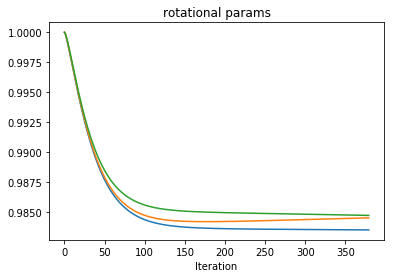

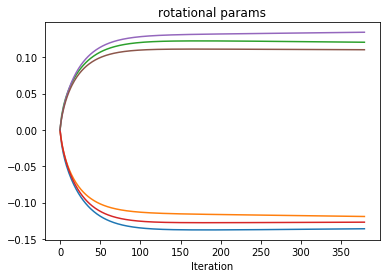

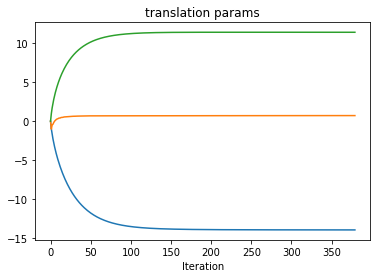

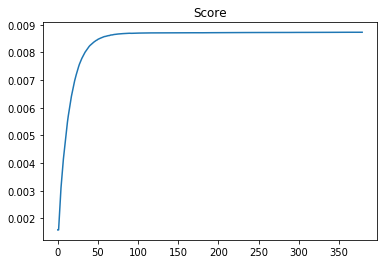

In [35]:
plot_alignment_results(traj=aligner.Ts, scores=aligner.scores, select_best='max_value')

In [36]:
for structure_m in ['3N_L', '4N_L']:

    stack_m_spec = dict(name='atlasV6',
                   vol_type='score',
                   structure=structure_m,
                    resolution='10.0um'
                   )

    stack_f_spec = dict(name=stack,
                       vol_type='score',
                       detector_id=799,
                       structure=convert_to_original_name(structure_m),
                        resolution='10.0um'
                       )

    local_alignment_spec = dict(stack_m=stack_m_spec, 
                          stack_f=stack_f_spec,
                          warp_setting=27)
    
    tf_atlas_to_subj = compose_alignment_parameters([T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol, 
                                                             convert_transform_forms(aligner=aligner, out_form=(3,4))])

    DataManager.save_alignment_results_v3(transform_parameters=convert_transform_forms(transform=tf_atlas_to_subj, out_form='dict'),
                           score_traj=aligner.scores,
                           parameter_traj=aligner.Ts,
                          alignment_spec=local_alignment_spec)


    tf_atlas_to_subj = DataManager.load_alignment_results_v3(local_alignment_spec, what='parameters', out_form=(4,4))

    name_s = structure_m

    atlas_structure_wrt_canonicalAtlasSpace_atlasResol = DataManager.load_original_volume_v2(stack_spec=stack_m_spec, bbox_wrt='canonicalAtlasSpace', structure=name_s)

    aligned_structure_wrt_wholebrain_inputResol = \
    transform_volume_v4(volume=atlas_structure_wrt_canonicalAtlasSpace_atlasResol,
                        transform=tf_atlas_to_subj,
                        return_origin_instead_of_bbox=True)

    DataManager.save_transformed_volume_v2(volume=aligned_structure_wrt_wholebrain_inputResol, 
                                           alignment_spec=local_alignment_spec)

aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSHL_regist

Interpolating/filling sparse volume: 0.01 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_10.0um_3N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_3N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_3N_10.0um_3N_L_origin_wrt_fixedWholebrain.txt"
0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scor

Interpolating/filling sparse volume: 0.01 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um_4N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um_4N_L_origin_wrt_fixedWholebrain.txt"
0


# Register individual structures

upstream_warp_id                                                               None
transform_type                                                                rigid
terminate_thresh                                                                NaN
grad_computation_sample_number                                                10000
grid_search_sample_number                                                       NaN
std_tx_um                                                                       NaN
std_ty_um                                                                       NaN
std_tz_um                                                                       NaN
std_theta_xy_degree                                                             NaN
surround_weight                                                             inverse
regularization_weight                                                             0
comment                           local reg with surr with global transform 

Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['4N_L', '4N_L_surround_200um'].
Prior structure/index map not found. Generating a new one.
Loaded fixed volumes: ['4N_L'].
Computing structure sizes: 0.00 s
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
Set initial transform to [ 9.87580130e-01  1.57126095e-01  0.00000000e+00  1.26509838e+03
 -1.57126095e-01  9.87580130e-01  0.00000000e+00  4.90968802e+02
  0.00000000e+00  0.00000000e+00  1.00000000e+00  4.60000000e+02].
centroid_m: [1149.32592386  406.1053642   436.        ], centroid_f: [1149.32592386  406.1053642   436.        ]
indices_f: set([1])

iteration 0
Norm of gradient (translation) = 1.732051
Norm of gradient (rotation) = 1.732051
around x=-0.58; around y=-0.57; around z=0.58
step: 0.03 seconds
current score: 0.000125
new_T: [ 0.9999     -0.0099495  -0.0100495   0.98996691  0.0100495   0.9999
  0.0099495   1.00996642  0.0099495  -0.0100

Norm of gradient (translation) = 0.156039
Norm of gradient (rotation) = 0.229578
around x=-5.44; around y=-4.45; around z=5.45
step: 0.03 seconds
current score: 0.000290
new_T: [ 0.99247439 -0.08718982 -0.0859798  -2.0715964   0.09466376  0.99169492
  0.08706298  9.24945397  0.07767472 -0.09454695  0.99248552  7.13926   ]
det: 1.00

iteration 28
Norm of gradient (translation) = 0.149829
Norm of gradient (rotation) = 0.220933
around x=-5.54; around y=-4.45; around z=5.53
step: 0.03 seconds
current score: 0.000291
new_T: [ 0.9923356  -0.08850188 -0.08624078 -2.15383029  0.09612688  0.9914102
  0.08868731  9.39213381  0.077651   -0.09629763  0.99231905  7.12848368]
det: 1.00

iteration 29
Norm of gradient (translation) = 0.146210
Norm of gradient (rotation) = 0.212838
around x=-5.64; around y=-4.45; around z=5.61
step: 0.03 seconds
current score: 0.000292
new_T: [ 0.9921988  -0.08977043 -0.08650322 -2.23630508  0.09754177  0.99113134
  0.09024566  9.52994733  0.07763466 -0.09797931  0.992

Norm of gradient (translation) = 0.082652
Norm of gradient (rotation) = 0.118148
around x=-7.43; around y=-4.41; around z=7.18
step: 0.03 seconds
current score: 0.000310
new_T: [ 0.9892312  -0.11401518 -0.09177235 -3.73198794  0.12455576  0.9850773
  0.11877955 12.1537507   0.07686019 -0.12893122  0.98867045  6.88373009]
det: 1.00

iteration 56
Norm of gradient (translation) = 0.080823
Norm of gradient (rotation) = 0.115738
around x=-7.48; around y=-4.41; around z=7.22
step: 0.03 seconds
current score: 0.000311
new_T: [ 0.98913168 -0.11472848 -0.09195595 -3.77412206  0.12535287  0.98487824
  0.11958896 12.23091691  0.07684516 -0.12981617  0.98855581  6.87772177]
det: 1.00

iteration 57
Norm of gradient (translation) = 0.079821
Norm of gradient (rotation) = 0.114415
around x=-7.53; around y=-4.41; around z=7.27
step: 0.03 seconds
current score: 0.000311
new_T: [ 0.98903263 -0.11543389 -0.09213835 -3.81545686  0.12614128  0.98468016
  0.12038836 12.307237    0.07682991 -0.13069046  0.988

Norm of gradient (translation) = 0.061215
Norm of gradient (rotation) = 0.087863
around x=-8.66; around y=-4.36; around z=8.29
step: 0.03 seconds
current score: 0.000319
new_T: [ 0.98667815 -0.13129285 -0.09606468 -4.74491648  0.14384429  0.97990713
  0.13816958 14.01568161  0.07599379 -0.15014726  0.98573868  6.68486969]
det: 1.00

iteration 84
Norm of gradient (translation) = 0.060596
Norm of gradient (rotation) = 0.087431
around x=-8.70; around y=-4.36; around z=8.33
step: 0.03 seconds
current score: 0.000319
new_T: [ 0.98659196 -0.13183595 -0.09620598 -4.77428866  0.1444514   0.97973286
  0.13877071 14.07418861  0.07596119 -0.15080716  0.98564045  6.67830828]
det: 1.00

iteration 85
Norm of gradient (translation) = 0.060548
Norm of gradient (rotation) = 0.087028
around x=-8.74; around y=-4.35; around z=8.36
step: 0.03 seconds
current score: 0.000319
new_T: [ 0.98650599 -0.13237666 -0.09634494 -4.80432723  0.14505559  0.97955863
  0.13936918 14.13237532  0.07592629 -0.15146391  0.98

Norm of gradient (translation) = 0.053334
Norm of gradient (rotation) = 0.077601
around x=-9.66; around y=-4.30; around z=9.22
step: 0.03 seconds
current score: 0.000322
new_T: [ 0.98429796 -0.14555345 -0.09985845 -5.47844942  0.15979741  0.97509179
  0.15382062 15.55106642  0.07498203 -0.16736245  0.98303993  6.50094015]
det: 1.00

iteration 112
Norm of gradient (translation) = 0.053089
Norm of gradient (rotation) = 0.077487
around x=-9.70; around y=-4.30; around z=9.25
step: 0.03 seconds
current score: 0.000322
new_T: [ 0.98421292 -0.146036   -0.09999207 -5.50125605  0.16033803  0.9749201
  0.15434546 15.60305227  0.07494428 -0.16794132  0.98294408  6.494628  ]
det: 1.00

iteration 113
Norm of gradient (translation) = 0.053016
Norm of gradient (rotation) = 0.077628
around x=-9.73; around y=-4.29; around z=9.28
step: 0.03 seconds
current score: 0.000322
new_T: [ 0.98412926 -0.14652058 -0.10010649 -5.52444929  0.16087774  0.97474724
  0.15487467 15.65492027  0.0748862  -0.1685216   0.9

Norm of gradient (translation) = 0.051620
Norm of gradient (rotation) = 0.076678
around x=-10.59; around y=-4.21; around z=10.09
step: 0.03 seconds
current score: 0.000326
new_T: [ 0.9818664  -0.15894098 -0.10332543 -6.05253152  0.17475255  0.97011775
  0.1683244  16.98844071  0.07348419 -0.18332845  0.98030136  6.28841223]
det: 1.00

iteration 140
Norm of gradient (translation) = 0.051708
Norm of gradient (rotation) = 0.076895
around x=-10.63; around y=-4.21; around z=10.12
step: 0.03 seconds
current score: 0.000327
new_T: [ 0.98177639 -0.15942186 -0.10343982 -6.0708887   0.17528769  0.96993103
  0.16884317 17.03985261  0.07341219 -0.18389797  0.98020008  6.27926486]
det: 1.00

iteration 141
Norm of gradient (translation) = 0.051728
Norm of gradient (rotation) = 0.076579
around x=-10.66; around y=-4.21; around z=10.15
step: 0.03 seconds
current score: 0.000326
new_T: [ 0.98168486 -0.15989956 -0.10357104 -6.08904378  0.1758224   0.96974473
  0.16935656 17.09123176  0.07335743 -0.184464

Norm of gradient (translation) = 0.054681
Norm of gradient (rotation) = 0.081731
around x=-11.54; around y=-4.10; around z=10.99
step: 0.03 seconds
current score: 0.000330
new_T: [ 0.97915464 -0.17270658 -0.10690477 -6.49867293  0.19011641  0.96454304
  0.18306415 18.46536859  0.07149787 -0.19957246  0.97727114  6.0481471 ]
det: 1.00

iteration 168
Norm of gradient (translation) = 0.054765
Norm of gradient (rotation) = 0.081875
around x=-11.58; around y=-4.10; around z=11.02
step: 0.03 seconds
current score: 0.000330
new_T: [ 0.97904993 -0.17321836 -0.10703563 -6.5115714   0.19068675  0.9643268
  0.18360931 18.52025052  0.07141283 -0.20017296  0.97715454  6.03871452]
det: 1.00

iteration 169
Norm of gradient (translation) = 0.054931
Norm of gradient (rotation) = 0.082404
around x=-11.61; around y=-4.09; around z=11.05
step: 0.03 seconds
current score: 0.000330
new_T: [ 0.97894549 -0.17373458 -0.10715417 -6.52478076  0.19125934  0.9641084
  0.18415985 18.57533014  0.0713133  -0.20077669

Norm of gradient (translation) = 0.062057
Norm of gradient (rotation) = 0.092678
around x=-12.58; around y=-3.93; around z=11.98
step: 0.03 seconds
current score: 0.000335
new_T: [ 0.97593919 -0.18791438 -0.11059329 -6.83730661  0.20700263  0.95784986
  0.19918221 20.09023443  0.06850256 -0.21728283  0.97370199  5.73105353]
det: 1.00

iteration 196
Norm of gradient (translation) = 0.062408
Norm of gradient (rotation) = 0.093043
around x=-12.62; around y=-3.92; around z=12.01
step: 0.03 seconds
current score: 0.000336
new_T: [ 0.9758106  -0.18849686 -0.11073664 -6.84861713  0.20764883  0.95758224
  0.19979544 20.15242101  0.06837863 -0.21795684  0.97356005  5.71841167]
det: 1.00

iteration 197
Norm of gradient (translation) = 0.062887
Norm of gradient (rotation) = 0.093796
around x=-12.66; around y=-3.91; around z=12.05
step: 0.03 seconds
current score: 0.000336
new_T: [ 0.97568098 -0.18908451 -0.11087682 -6.85945833  0.2082997   0.95731159
  0.20041397 20.2150709   0.06824848 -0.218635

Norm of gradient (translation) = 0.074278
Norm of gradient (rotation) = 0.110297
around x=-13.78; around y=-3.68; around z=13.13
step: 0.03 seconds
current score: 0.000344
new_T: [ 0.97185439 -0.20574172 -0.11475798 -7.14508878  0.22668642  0.94930094
  0.21780955 21.98462147  0.06412735 -0.23769324  0.96922113  5.2976609 ]
det: 1.00

iteration 224
Norm of gradient (translation) = 0.074961
Norm of gradient (rotation) = 0.111105
around x=-13.83; around y=-3.67; around z=13.17
step: 0.03 seconds
current score: 0.000344
new_T: [ 0.97168645 -0.20643845 -0.11492869 -7.15741685  0.22745554  0.94895111
  0.21853094 22.05860305  0.06394852 -0.23848472  0.96903851  5.28020814]
det: 1.00

iteration 225
Norm of gradient (translation) = 0.075431
Norm of gradient (rotation) = 0.111810
around x=-13.87; around y=-3.66; around z=13.22
step: 0.03 seconds
current score: 0.000344
new_T: [ 0.97151667 -0.20713938 -0.11510272 -7.17049102  0.2282297   0.94859789
  0.21925613 22.13304685  0.06376962 -0.239280

Norm of gradient (translation) = 0.085327
Norm of gradient (rotation) = 0.125982
around x=-15.17; around y=-3.33; around z=14.49
step: 0.03 seconds
current score: 0.000358
new_T: [ 0.96656258 -0.22677262 -0.119712   -7.57273233  0.24977485  0.93825913
  0.23933727 24.20261539  0.05804574 -0.26123549  0.96352826  4.70250465]
det: 1.00

iteration 252
Norm of gradient (translation) = 0.085515
Norm of gradient (rotation) = 0.126269
around x=-15.22; around y=-3.31; around z=14.54
step: 0.03 seconds
current score: 0.000359
new_T: [ 0.96635175 -0.22756706 -0.11990629 -7.59200441  0.25064544  0.93782166
  0.24014038 24.28611326  0.05780268 -0.26211404  0.96330425  4.6786084 ]
det: 1.00

iteration 253
Norm of gradient (translation) = 0.085718
Norm of gradient (rotation) = 0.126471
around x=-15.27; around y=-3.30; around z=14.59
step: 0.03 seconds
current score: 0.000360
new_T: [ 0.96613926 -0.22836184 -0.12010748 -7.61208782  0.25151796  0.93738198
  0.24094342 24.36977235  0.05756431 -0.262994

Norm of gradient (translation) = 0.082914
Norm of gradient (rotation) = 0.121400
around x=-16.61; around y=-2.93; around z=15.93
step: 0.03 seconds
current score: 0.000380
new_T: [ 0.96036361 -0.24887507 -0.12555055 -8.24238155  0.27402025  0.92550796
  0.26143434 26.52254725  0.05113354 -0.28547541  0.95702098  4.01314315]
det: 1.00

iteration 280
Norm of gradient (translation) = 0.082557
Norm of gradient (rotation) = 0.120231
around x=-16.66; around y=-2.92; around z=15.97
step: 0.03 seconds
current score: 0.000382
new_T: [ 0.96013968 -0.24962693 -0.12577036 -8.27286528  0.27484767  0.92505213
  0.26217804 26.60143888  0.05089744 -0.28629523  0.95678864  3.98884611]
det: 1.00

iteration 281
Norm of gradient (translation) = 0.082075
Norm of gradient (rotation) = 0.119807
around x=-16.71; around y=-2.90; around z=16.02
step: 0.03 seconds
current score: 0.000382
new_T: [ 0.95991613 -0.25037684 -0.12598598 -8.30060066  0.27567165  0.92459656
  0.2629189  26.68006105  0.05065741 -0.287110

Norm of gradient (translation) = 0.064125
Norm of gradient (rotation) = 0.092183
around x=-17.82; around y=-2.57; around z=17.16
step: 0.03 seconds
current score: 0.000402
new_T: [ 0.95454866 -0.26769752 -0.13105304 -8.98984071  0.29466593  0.91369616
  0.27987732 28.48920503  0.04482019 -0.30577339  0.95104878  3.37191444]
det: 1.00

iteration 308
Norm of gradient (translation) = 0.062798
Norm of gradient (rotation) = 0.091106
around x=-17.86; around y=-2.56; around z=17.19
step: 0.03 seconds
current score: 0.000403
new_T: [ 0.95436573 -0.26826689 -0.13122094 -9.01259074  0.29528857  0.91332571
  0.28042966 28.54843142  0.04461747 -0.30638051  0.95086291  3.35148187]
det: 1.00

iteration 309
Norm of gradient (translation) = 0.062548
Norm of gradient (rotation) = 0.089789
around x=-17.90; around y=-2.55; around z=17.23
step: 0.03 seconds
current score: 0.000403
new_T: [ 0.95418277 -0.26882055 -0.13141826 -9.03935127  0.2959046   0.91296009
  0.28097037 28.60693251  0.04444902 -0.306984

Norm of gradient (translation) = 0.041296
Norm of gradient (rotation) = 0.059477
around x=-18.66; around y=-2.32; around z=18.01
step: 0.03 seconds
current score: 0.000414
new_T: [ 0.95020032 -0.28066686 -0.13544544 -9.57840047  0.30899713  0.90498648
  0.29243845 29.84963969  0.04049851 -0.31972736  0.9466437   2.93017957]
det: 1.00

iteration 336
Norm of gradient (translation) = 0.040624
Norm of gradient (rotation) = 0.058176
around x=-18.69; around y=-2.31; around z=18.04
step: 0.03 seconds
current score: 0.000414
new_T: [ 0.95007622 -0.28102602 -0.1355712  -9.59593846  0.3093944   0.90473904
  0.29278385 29.88727978  0.04037668 -0.32011194  0.94651892  2.91763021]
det: 1.00

iteration 337
Norm of gradient (translation) = 0.039986
Norm of gradient (rotation) = 0.057277
around x=-18.71; around y=-2.31; around z=18.06
step: 0.03 seconds
current score: 0.000414
new_T: [ 0.94995427 -0.2813811  -0.13568919 -9.6134474   0.30978504  0.90449508
  0.29312435 29.92428119  0.04025056 -0.320489

Norm of gradient (translation) = 0.024461
Norm of gradient (rotation) = 0.035162
around x=-19.17; around y=-2.16; around z=18.54
step: 0.03 seconds
current score: 0.000418
new_T: [ 0.94742673 -0.28861741 -0.13813976 -9.95920151  0.3177487   0.8994588
  0.30001605 30.6781854   0.03766116 -0.32813695  0.94387911  2.63978151]
det: 1.00

iteration 364
Norm of gradient (translation) = 0.023927
Norm of gradient (rotation) = 0.033979
around x=-19.18; around y=-2.15; around z=18.55
step: 0.03 seconds
current score: 0.000418
new_T: [ 0.94735138 -0.28882617 -0.13822016 -9.96971302  0.31798133  0.89931048
  0.30021415 30.7001781   0.03759314 -0.32835972  0.94380435  2.63277985]
det: 1.00

iteration 365
Norm of gradient (translation) = 0.023689
Norm of gradient (rotation) = 0.033353
around x=-19.20; around y=-2.15; around z=18.57
step: 0.03 seconds
current score: 0.000419
new_T: [ 0.94727727 -0.28903084 -0.13830018 -9.98138148  0.31820978  0.89916482
  0.30040834 30.72174414  0.03752738 -0.3285784

Norm of gradient (translation) = 0.013916
Norm of gradient (rotation) = 0.019547
around x=-19.46; around y=-2.06; around z=18.84
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94579017  -0.29319483  -0.1397059  -10.18608663   0.32277755
   0.89622918   0.30428261  31.15311684   0.03599441  -0.33288143
   0.94228146   2.46870895]
det: 1.00

iteration 392
Norm of gradient (translation) = 0.013663
Norm of gradient (rotation) = 0.019145
around x=-19.46; around y=-2.06; around z=18.85
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94574656  -0.29331373  -0.13975158 -10.19245195   0.32290969
   0.8961444    0.30439208  31.16557123   0.03595523  -0.3330049
   0.94223933   2.46462668]
det: 1.00

iteration 393
Norm of gradient (translation) = 0.013311
Norm of gradient (rotation) = 0.018746
around x=-19.47; around y=-2.06; around z=18.86
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94570402  -0.29343115  -0.1397929  -10.19829679   0.32303889
   0.89606133   0.30449953  

Norm of gradient (translation) = 0.007928
Norm of gradient (rotation) = 0.010733
around x=-19.61; around y=-2.01; around z=19.01
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94485536  -0.29577587  -0.14058797 -10.31491279   0.32560574
   0.89441602   0.30659563  31.41945507   0.03506054  -0.33546478
   0.9414001    2.37266361]
det: 1.00

iteration 420
Norm of gradient (translation) = 0.007840
Norm of gradient (rotation) = 0.010437
around x=-19.62; around y=-2.01; around z=19.02
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94483109  -0.2958432   -0.14060942 -10.3196773    0.32567888
   0.89436948   0.30665373  31.42629586   0.03503536  -0.33552949
   0.94137797   2.36986538]
det: 1.00

iteration 421
Norm of gradient (translation) = 0.007398
Norm of gradient (rotation) = 0.010297
around x=-19.62; around y=-2.01; around z=19.02
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94480715  -0.2959098   -0.14063014 -10.32189253   0.32575104
   0.89432355   0.30671101 

Norm of gradient (translation) = 0.004541
Norm of gradient (rotation) = 0.005875
around x=-19.69; around y=-1.98; around z=19.11
step: 0.04 seconds
current score: 0.000421
new_T: [  0.94433323  -0.29720845  -0.14107403 -10.38576641   0.3271698
   0.89343586   0.30778612  31.56609717   0.03456396  -0.33680783
   0.9409388    2.32131571]
det: 1.00

iteration 448
Norm of gradient (translation) = 0.004344
Norm of gradient (rotation) = 0.005713
around x=-19.70; around y=-1.98; around z=19.11
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94431917  -0.29724597  -0.14108912 -10.38804236   0.32721149
   0.8934104    0.30781568  31.56998536   0.03455352  -0.33684223
   0.94092687   2.32017068]
det: 1.00

iteration 449
Norm of gradient (translation) = 0.004256
Norm of gradient (rotation) = 0.005686
around x=-19.70; around y=-1.98; around z=19.11
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94430568  -0.29728517  -0.14109684 -10.38996475   0.32725229
   0.89338513   0.30784566  

Norm of gradient (translation) = 0.002525
Norm of gradient (rotation) = 0.003164
around x=-19.73; around y=-1.97; around z=19.16
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94404087  -0.29801455  -0.14132995 -10.42532009   0.3280402
   0.89291781   0.30836246  31.64707381   0.03429953  -0.33746867
   0.94071167   2.29366833]
det: 1.00

iteration 476
Norm of gradient (translation) = 0.002437
Norm of gradient (rotation) = 0.002953
around x=-19.74; around y=-1.97; around z=19.16
step: 0.03 seconds
current score: 0.000421
new_T: [  0.9440334   -0.29803662  -0.14133331 -10.42674282   0.3280627
   0.89290489   0.30837595  31.64914391   0.03428987  -0.33748339
   0.94070674   2.29260499]
det: 1.00

iteration 477
Norm of gradient (translation) = 0.002562
Norm of gradient (rotation) = 0.002910
around x=-19.74; around y=-1.96; around z=19.16
step: 0.03 seconds
current score: 0.000421
new_T: [  0.9440263   -0.29805883  -0.14133395 -10.42846528   0.32808441
   0.89289235   0.30838916  3

Norm of gradient (translation) = 0.001300
Norm of gradient (rotation) = 0.001481
around x=-19.75; around y=-1.96; around z=19.19
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94388202  -0.29846514  -0.14144008 -10.44816875   0.32851194
   0.89266653   0.30858772  31.69028179   0.03415614  -0.33773515
   0.94062124   2.27812733]
det: 1.00

iteration 504
Norm of gradient (translation) = 0.001324
Norm of gradient (rotation) = 0.001506
around x=-19.75; around y=-1.96; around z=19.19
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94387795  -0.29847801  -0.14144009 -10.44859362   0.32852427
   0.89266044   0.30859218  31.69140156   0.03414999  -0.33773986
   0.94061978   2.27749275]
det: 1.00

iteration 505
Norm of gradient (translation) = 0.001315
Norm of gradient (rotation) = 0.001462
around x=-19.75; around y=-1.96; around z=19.19
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94387385  -0.29849044  -0.14144119 -10.44927218   0.32853656
   0.89265446   0.30859641 

Norm of gradient (translation) = 0.001036
Norm of gradient (rotation) = 0.000973
around x=-19.76; around y=-1.95; around z=19.21
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94379006  -0.29873368  -0.14148677 -10.46022688   0.32878348
   0.89255014   0.30863519  31.71458451   0.03408431  -0.33780533
   0.94059865   2.27007997]
det: 1.00

iteration 532
Norm of gradient (translation) = 0.001039
Norm of gradient (rotation) = 0.000930
around x=-19.76; around y=-1.95; around z=19.21
step: 0.04 seconds
current score: 0.000421
new_T: [  0.94378778  -0.29874219  -0.14148402 -10.46087868   0.32879059
   0.8925475    0.30863522  31.71520004   0.03407885  -0.33780476
   0.94059905   2.26945161]
det: 1.00

iteration 533
Norm of gradient (translation) = 0.000906
Norm of gradient (rotation) = 0.000861
around x=-19.76; around y=-1.95; around z=19.21
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94378552  -0.29875023  -0.14148211 -10.46138893   0.32879754
   0.89254504   0.30863495 

Norm of gradient (translation) = 0.000737
Norm of gradient (rotation) = 0.000561
around x=-19.75; around y=-1.95; around z=19.22
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94373629  -0.29890761  -0.14147813 -10.46903695   0.32894328
   0.89250793   0.30858696  31.72827575   0.03403136  -0.33776299
   0.94061577   2.26365455]
det: 1.00

iteration 560
Norm of gradient (translation) = 0.000481
Norm of gradient (rotation) = 0.000552
around x=-19.75; around y=-1.95; around z=19.22
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94373482  -0.29891131  -0.14148011 -10.46947085   0.32894733
   0.89250771   0.30858328  31.72860346   0.03403306  -0.33776029
   0.94061668   2.26376103]
det: 1.00

iteration 561
Norm of gradient (translation) = 0.000411
Norm of gradient (rotation) = 0.000564
around x=-19.75; around y=-1.95; around z=19.22
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94373333  -0.29891487  -0.14148252 -10.46972728   0.32895138
   0.89250752   0.30857952 

Norm of gradient (translation) = 0.000479
Norm of gradient (rotation) = 0.000607
around x=-19.75; around y=-1.95; around z=19.22
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94370466  -0.29902079  -0.14144989 -10.47295912   0.32903685
   0.89251058   0.30847952  31.73573465   0.03400373  -0.33765579
   0.94065526   2.2600406 ]
det: 1.00

iteration 588
Norm of gradient (translation) = 0.000376
Norm of gradient (rotation) = 0.000554
around x=-19.75; around y=-1.95; around z=19.22
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94370378  -0.29902369  -0.14144967 -10.47276751   0.32903935
   0.89251131   0.30847476  31.7359273    0.03400417  -0.3376513
   0.94065685   2.26009886]
det: 1.00

iteration 589
Norm of gradient (translation) = 0.000516
Norm of gradient (rotation) = 0.000572
around x=-19.75; around y=-1.95; around z=19.22
step: 0.03 seconds
current score: 0.000420
new_T: [  0.943703    -0.29902659  -0.14144876 -10.47239783   0.32904161
   0.89251215   0.3084699   

Norm of gradient (translation) = 0.000732
Norm of gradient (rotation) = 0.000790
around x=-19.74; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94368373  -0.29910475  -0.14141202 -10.47387217   0.3290985
   0.89253471   0.3083439   31.74020805   0.03398802  -0.3375176
   0.94070542   2.257886  ]
det: 1.00

iteration 616
Norm of gradient (translation) = 0.000604
Norm of gradient (rotation) = 0.000601
around x=-19.74; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94368313  -0.29910703  -0.14141123 -10.47446547   0.3291002
   0.89253596   0.30833848  31.74030766   0.0339884   -0.33751228
   0.94070731   2.25782419]
det: 1.00

iteration 617
Norm of gradient (translation) = 0.000606
Norm of gradient (rotation) = 0.000707
around x=-19.74; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94368264  -0.29911037  -0.14140744 -10.47415679   0.3291019
   0.89253703   0.30833356  31.

Norm of gradient (translation) = 0.000204
Norm of gradient (rotation) = 0.000619
around x=-19.73; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94366752  -0.29917218  -0.14137761 -10.47752521   0.32914517
   0.89256946   0.30819347  31.74319432   0.03398643  -0.33736593
   0.94075988   2.25670633]
det: 1.00

iteration 644
Norm of gradient (translation) = 0.000155
Norm of gradient (rotation) = 0.000665
around x=-19.73; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000420
new_T: [  0.94366715  -0.29917339  -0.14137751 -10.4776754    0.32914606
   0.89257131   0.30818717  31.74322609   0.03398811  -0.33735996
   0.94076196   2.25683239]
det: 1.00

iteration 645
Norm of gradient (translation) = 0.000205
Norm of gradient (rotation) = 0.000665
around x=-19.73; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000420
new_T: [  0.9436668   -0.29917469  -0.14137708 -10.4778614    0.32914691
   0.89257316   0.30818089 

Norm of gradient (translation) = 0.000280
Norm of gradient (rotation) = 0.000711
around x=-19.72; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94365948  -0.29921567  -0.14133917 -10.47801748   0.32916729
   0.89261851   0.30802776  31.74394997   0.03399523  -0.33719755
   0.94081993   2.25689041]
det: 1.00

iteration 671
Norm of gradient (translation) = 0.000280
Norm of gradient (rotation) = 0.000679
around x=-19.72; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000421
new_T: [  0.9436592   -0.29921746  -0.14133725 -10.47796205   0.32916811
   0.89262029   0.30802172  31.74398024   0.03399502  -0.33719125
   0.94082219   2.2568533 ]
det: 1.00

iteration 672
Norm of gradient (translation) = 0.000117
Norm of gradient (rotation) = 0.000653
around x=-19.72; around y=-1.95; around z=19.23
step: 0.03 seconds
current score: 0.000421
new_T: [  0.94365877  -0.29921873  -0.14133748 -10.47807706   0.32916916
   0.89262204   0.30801552 

Best parameters =
[[  0.94376876  -0.2988018   -0.141485   -10.46369422]
 [  0.32884716   0.89252806   0.30863118  31.72014821]
 [  0.03405978  -0.33780341   0.94060023   2.26726328]]
Best score = 0.00042119016109404327 , initial score = 0.00012528006014315155


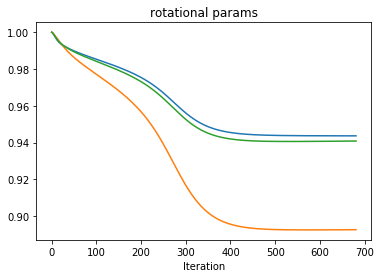

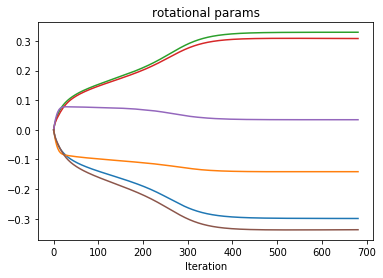

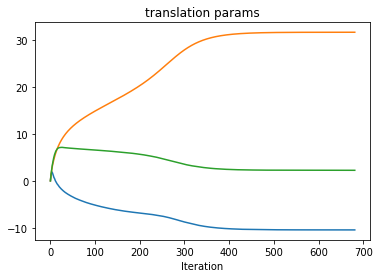

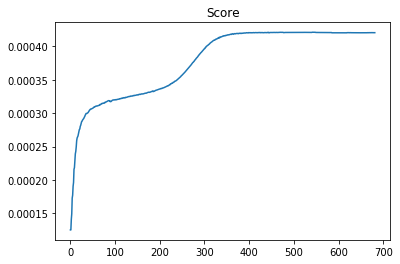

aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_parameters.json" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_parameters.json"
0
aws s3 cp "/home/yuncong/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_scoreHistory.bp" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_scoreHistory.bp"
0
aws s3 cp "/home/yuncong/CSHL_regist

Interpolating/filling sparse volume: 0.01 seconds.


0
aws s3 cp "/home/yuncong/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um_4N_L_origin_wrt_fixedWholebrain.txt" "s3://mousebrainatlas-data/CSHL_volumes/atlasV6/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um/score_volumes/atlasV6_10.0um_scoreVolume_4N_L_warp27_CHATM3_detector799_10.0um_scoreVolume_4N_10.0um_4N_L_origin_wrt_fixedWholebrain.txt"
0


In [50]:
# for structure_m in ['3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R', '10N_L', '10N_R', '12N']:
for structure_m in ['4N_L']:

    stack_m_spec = dict(name='atlasV6',
                       vol_type='score',
                       structure=structure_m,
                        resolution='10.0um'
                       )

    stack_f_spec = dict(name=stack,
                       vol_type='score',
                       detector_id=799,
                       structure=convert_to_original_name(structure_m),
                        resolution='10.0um'
                       )

    local_alignment_spec = dict(stack_m=stack_m_spec, 
                          stack_f=stack_f_spec,
                          warp_setting=27)

    local_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=local_alignment_spec,
    structures_m=[structure_m],
                fixed_surroundings_have_positive_value=False,
                                                              fixed_structures_are_sided=True,
                                                              fixed_use_surround=False
    )

    aligner = Aligner(local_aligner_parameters['volume_fixed'], 
                      local_aligner_parameters['volume_moving'], 
                      labelIndexMap_m2f=local_aligner_parameters['label_mapping_m2f'])

    T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol = bp.unpack_ndarray_file('/home/yuncong/' + stack_f_spec['name'] + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp')

    aligner.set_initial_transform(params=T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.flatten())

    aligner.set_centroid(centroid_m='structure_centroid', 
                         centroid_f='centroid_m',
                        indices_m=[local_aligner_parameters['structure_to_label_moving'][structure_m]])

    aligner.compute_gradient(smooth_first=True)

    aligner.set_label_weights(label_weights=local_aligner_parameters['label_weights_m'])

    _, _ = aligner.optimize(tf_type=local_aligner_parameters['transform_type'], 
    #                             max_iter_num=0,
                                 max_iter_num=5000,
                                 history_len=100, 
                                 terminate_thresh_trans=.01,
                            terminate_thresh_rot=0.02,
                                 full_lr=np.array([1,1,1,.01,.01,.01]),
                                )

    plot_alignment_results(traj=aligner.Ts, scores=aligner.scores, select_best='max_value')

    tf_atlas_to_subj = compose_alignment_parameters([T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol, 
                                                             convert_transform_forms(aligner=aligner, out_form=(3,4))])

    DataManager.save_alignment_results_v3(transform_parameters=convert_transform_forms(transform=tf_atlas_to_subj, out_form='dict'),
                           score_traj=aligner.scores,
                           parameter_traj=aligner.Ts,
                          alignment_spec=local_alignment_spec)


    tf_atlas_to_subj = DataManager.load_alignment_results_v3(local_alignment_spec, what='parameters', out_form=(4,4))

    name_s = structure_m

    atlas_structure_wrt_canonicalAtlasSpace_atlasResol = DataManager.load_original_volume_v2(stack_spec=stack_m_spec, bbox_wrt='canonicalAtlasSpace', structure=name_s)

    aligned_structure_wrt_wholebrain_inputResol = \
    transform_volume_v4(volume=atlas_structure_wrt_canonicalAtlasSpace_atlasResol,
                        transform=tf_atlas_to_subj,
                        return_origin_instead_of_bbox=True)

    DataManager.save_transformed_volume_v2(volume=aligned_structure_wrt_wholebrain_inputResol, 
                                           alignment_spec=local_alignment_spec)

# Visualize

In [37]:
def get_structure_contours_from_structure_volumes_v3(volumes, stack, sections, 
                                                     resolution, level, sample_every=1,
                                                    use_unsided_name_as_key=False):
    """
    Re-section atlas volumes and obtain structure contours on each section.
    Resolution of output contours are in volume resolution.
    v3 supports multiple levels.

    Args:
        volumes (dict of (3D array, 3-tuple)): {structure: (volume, origin_wrt_wholebrain)}. volume is a 3d array of probability values.
        sections (list of int):
        resolution (int): resolution of input volumes.
        level (float or dict or dict of list): the cut-off probability at which surfaces are generated from probabilistic volumes. Default is 0.5.
        sample_every (int): how sparse to sample contour vertices.

    Returns:
        Dict {section: {name_s: contour vertices}}.
    """

    from collections import defaultdict
    
    structure_contours_wrt_alignedBrainstemCrop_rawResol = defaultdict(lambda: defaultdict(dict))

    converter = CoordinatesConverter(stack=stack, section_list=metadata_cache['sections_to_filenames'][stack].keys())

    converter.register_new_resolution('structure_volume', resol_um=convert_resolution_string_to_um(resolution=resolution, stack=stack))
    converter.register_new_resolution('image', resol_um=convert_resolution_string_to_um(resolution='raw', stack=stack))
    
    for name_s, (structure_volume_volResol, origin_wrt_wholebrain_volResol) in volumes.iteritems():

        converter.derive_three_view_frames(name_s, 
        origin_wrt_wholebrain_um=convert_resolution_string_to_um(resolution=resolution, stack=stack) * origin_wrt_wholebrain_volResol,
        zdim_um=convert_resolution_string_to_um(resolution=resolution, stack=stack) * structure_volume_volResol.shape[2])

        positions_of_all_sections_wrt_structureVolume = converter.convert_frame_and_resolution(
        p=np.array(sections)[:,None],
        in_wrt=('wholebrain', 'sagittal'), in_resolution='section',
        out_wrt=(name_s, 'sagittal'), out_resolution='structure_volume')[..., 2].flatten()
            
        structure_ddim = structure_volume_volResol.shape[2]
        
        valid_mask = (positions_of_all_sections_wrt_structureVolume >= 0) & (positions_of_all_sections_wrt_structureVolume < structure_ddim)
        if np.count_nonzero(valid_mask) == 0:
#             sys.stderr.write("%s, valid_mask is empty.\n" % name_s)
            continue

        positions_of_all_sections_wrt_structureVolume = positions_of_all_sections_wrt_structureVolume[valid_mask]
        positions_of_all_sections_wrt_structureVolume = np.round(positions_of_all_sections_wrt_structureVolume).astype(np.int)
        
        if isinstance(level, dict):
            level_this_structure = level[name_s]
        else:
            level_this_structure = level

        if isinstance(level_this_structure, float):
            level_this_structure = [level_this_structure]
                        
        for one_level in level_this_structure:

            contour_2d_wrt_structureVolume_sectionPositions_volResol = \
            find_contour_points_3d(structure_volume_volResol >= one_level,
                                    along_direction='sagittal',
                                    sample_every=sample_every,
                                    positions=positions_of_all_sections_wrt_structureVolume)

            for d_wrt_structureVolume, cnt_uv_wrt_structureVolume in contour_2d_wrt_structureVolume_sectionPositions_volResol.iteritems():

                contour_3d_wrt_structureVolume_volResol = np.column_stack([cnt_uv_wrt_structureVolume, np.ones((len(cnt_uv_wrt_structureVolume),)) * d_wrt_structureVolume])

    #             contour_3d_wrt_wholebrain_uv_rawResol_section = converter.convert_frame_and_resolution(
    #                 p=contour_3d_wrt_structureVolume_volResol,
    #                 in_wrt=(name_s, 'sagittal'), in_resolution='structure_volume',
    #                 out_wrt=('wholebrain', 'sagittal'), out_resolution='image_image_section')

                contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section = converter.convert_frame_and_resolution(
                    p=contour_3d_wrt_structureVolume_volResol,
                    in_wrt=(name_s, 'sagittal'), in_resolution='structure_volume',
                    out_wrt=('wholebrainXYcropped', 'sagittal'), out_resolution='image_image_section')

                assert len(np.unique(contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[:,2])) == 1
                sec = int(contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[0,2])

                if use_unsided_name_as_key:
                    name = convert_to_unsided_label(name_s)
                else:
                    name = name_s

                structure_contours_wrt_alignedBrainstemCrop_rawResol[sec][name][one_level] = contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[..., :2]
        
    return structure_contours_wrt_alignedBrainstemCrop_rawResol

In [51]:
section_margin_um = 500.
section_margin = int(section_margin_um / SECTION_THICKNESS)

valid_secmin = np.min(metadata_cache['valid_sections'][stack])
valid_secmax = np.max(metadata_cache['valid_sections'][stack])

In [52]:
for structure_m in ['4N_L']:
# for structure_m in ['3N_L', '4N_L']:
# for structure_m in ['3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R', '10N_L', '10N_R', '12N']:
# for structure_m in ['10N_R']:

    stack_m_spec = dict(name='atlasV6',
                       vol_type='score',
                       structure=structure_m,
                        resolution='10.0um'
                       )

    stack_f_spec = dict(name=stack,
                       vol_type='score',
                       detector_id=799,
                       structure=convert_to_original_name(structure_m),
                        resolution='10.0um'
                       )

    local_alignment_spec = dict(stack_m=stack_m_spec, 
                          stack_f=stack_f_spec,
                          warp_setting=27)

    v = DataManager.load_transformed_volume_v2(alignment_spec=local_alignment_spec, return_origin_instead_of_bbox=True)

    registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners = \
    load_json('/home/yuncong/' + stack + '_registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners.json')

    (_, _, secmin), (_, _, secmax) = registered_atlas_structures_wrt_wholebrainXYcropped_xysecTwoCorners[structure_m]

    atlas_structures_wrt_wholebrainWithMargin_sections = \
    range(max(secmin - section_margin, valid_secmin), min(secmax + 1 + section_margin, valid_secmax))

    levels = [0.1, 0.25, 0.5, 0.75, 0.99]

    contours_all_sections_all_structures_all_levels = \
    get_structure_contours_from_structure_volumes_v3(volumes={structure_m: v}, stack=stack, 
                                                     sections=atlas_structures_wrt_wholebrainWithMargin_sections,
                                                    resolution='10.0um', level=levels, sample_every=5)

    # prep2 because at end of get_structure_contours_from_structure_volumes_v2 we used wholebrainXYcropped

    for sec, contours_all_structures_all_levels in sorted(contours_all_sections_all_structures_all_levels.items()):
        
        if is_invalid(sec=sec, stack=stack):
            continue
            
        for version in ['NtbNormalizedAdaptiveInvertedGammaJpeg', 'CHATJpeg']:
            img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='raw', version=version, section=sec)

            for name_s, cnt_all_levels in contours_all_structures_all_levels.iteritems():
                viz = gray2rgb(img)
                for level, cnt in cnt_all_levels.iteritems():
                    cv2.polylines(viz, [cnt.astype(np.int)], isClosed=True, color=LEVEL_TO_COLOR_LINE[level], thickness=10)

#                 fp = os.path.join('/home/yuncong/' + stack + '_atlas_aligned_multilevel', name_s, version, stack + '_' + name_s + '_' + version + '_' + ('%03d' % sec) + '.jpg')
#                 print fp
#                 create_parent_dir_if_not_exists(fp)
#                 imsave(fp, viz)

                fp = os.path.join('/home/yuncong/' + stack + '_atlas_aligned_multilevel_down16', name_s, version, stack + '_' + name_s + '_' + version + '_' + ('%03d' % sec) + '.jpg')
                print fp
                create_parent_dir_if_not_exists(fp)
                imsave(fp, viz[::16, ::16])

2 contours of reconstructed volume is found at position 23 ([3, 2]). Use the longest one.
Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_slide72_2018_02_19-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_4N_L_NtbNormalizedAdaptiveInvertedGammaJpeg_214.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_CHATJpeg/CHATM3_slide72_2018_02_19-S3_prep2_raw_CHATJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_214.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_slide73_2018_01_26-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_4N_L_NtbNormalizedAdaptiveInvertedGammaJpeg_215.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_CHATJpeg/CHATM3_slide73_2018_01_26-S1_prep2_raw_CHATJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_215.jpg


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_215.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_slide73_2018_01_26-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_4N_L_NtbNormalizedAdaptiveInvertedGammaJpeg_217.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_CHATJpeg/CHATM3_slide73_2018_01_26-S2_prep2_raw_CHATJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_217.jpg


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_217.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_slide73_2018_01_26-S3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_4N_L_NtbNormalizedAdaptiveInvertedGammaJpeg_219.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_CHATJpeg/CHATM3_slide73_2018_01_26-S3_prep2_raw_CHATJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_219.jpg


/usr/local/lib/python2.7/dist-packages/skimage/io/_io.py:132: UserWarning: /home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_219.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_slide75_2018_01_26-S1_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_4N_L_NtbNormalizedAdaptiveInvertedGammaJpeg_221.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_CHATJpeg/CHATM3_slide75_2018_01_26-S1_prep2_raw_CHATJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_221.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_slide75_2018_01_26-S2_prep2_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/NtbNormalizedAdaptiveInvertedGammaJpeg/CHATM3_4N_L_NtbNormalizedAdaptiveInvertedGammaJpeg_223.jpg


Not using image_cache.


/data/CSHL_data_processed/CHATM3/CHATM3_prep2_raw_CHATJpeg/CHATM3_slide75_2018_01_26-S2_prep2_raw_CHATJpeg.jpg
/home/yuncong/CHATM3_atlas_aligned_multilevel_down16/4N_L/CHATJpeg/CHATM3_4N_L_CHATJpeg_223.jpg


In [64]:
img = DataManager.load_scoremap_viz_v2(stack=stack, structure='4N', detector_id=799,  out_resolution='10.0um',
                                     section=231)

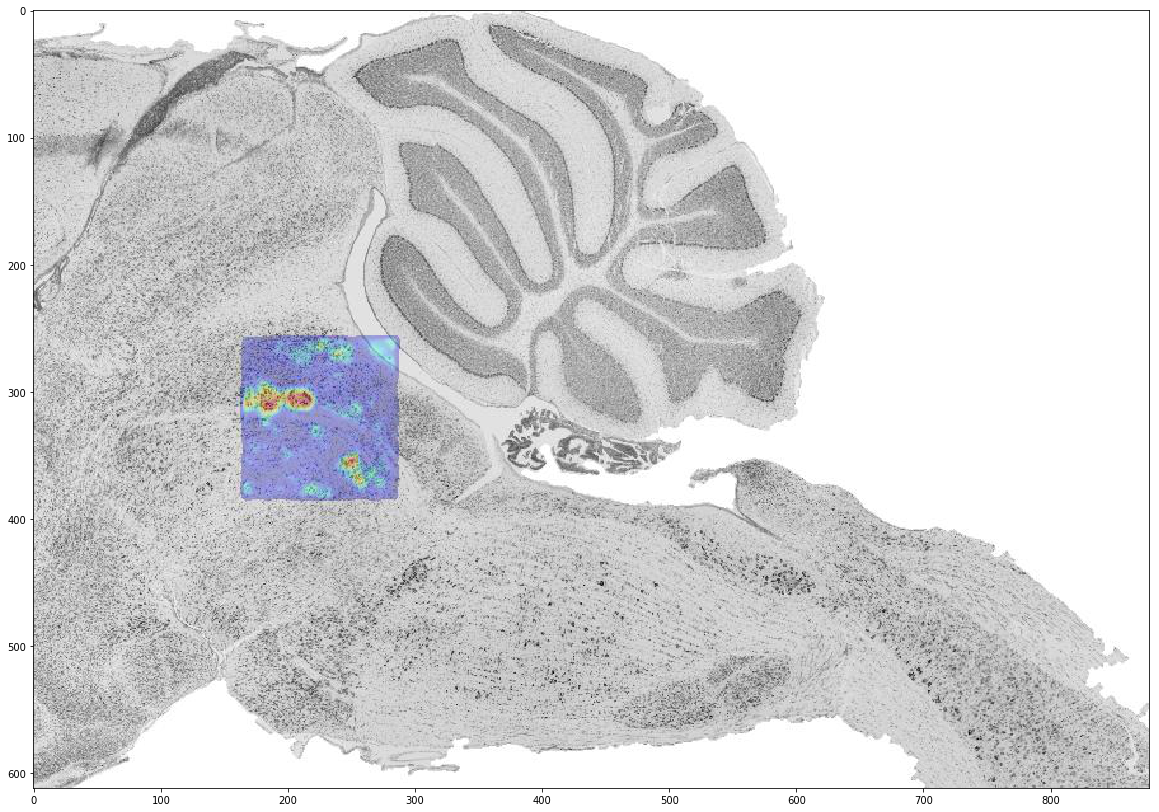

In [67]:
plt.figure(figsize=(20,20));
plt.imshow(img)

In [54]:
local_aligner_parameters['volume_fixed'][1][1]

array([1092.76,  357.92,  374.  ])

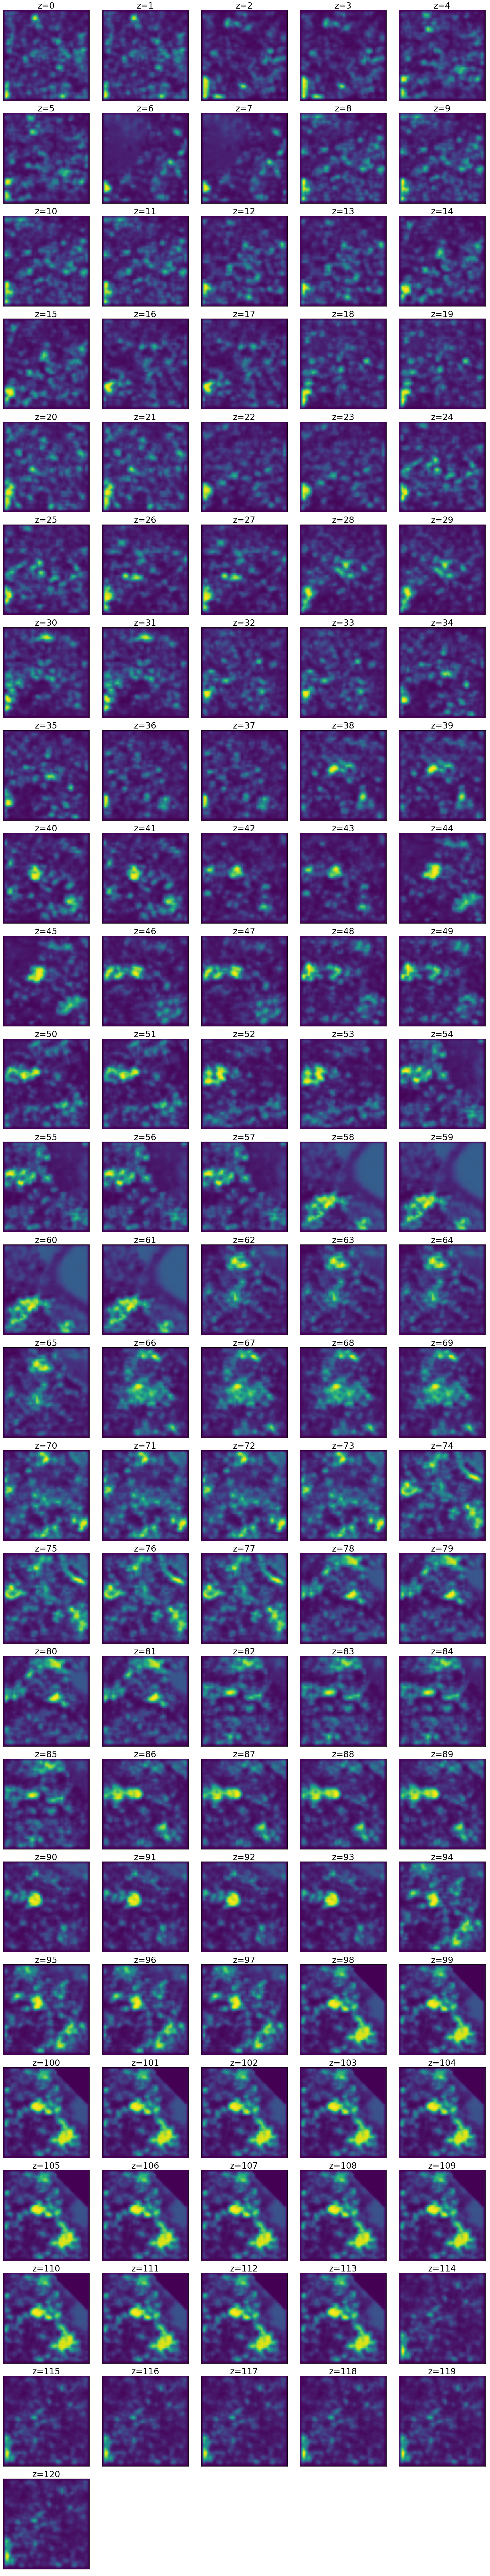

In [69]:
display_volume_sections(local_aligner_parameters['volume_fixed'][1][0], every=1, title_fontsize=30)

# Score history

In [ ]:
for structure_m in ['3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R', '10N_L', '10N_R', '12N']:

    stack_m_spec = dict(name='atlasV6',
                       vol_type='score',
                       structure=structure_m,
                        resolution='10.0um'
                       )

    stack_f_spec = dict(name=stack,
                       vol_type='score',
                       detector_id=799,
                       structure=convert_to_original_name(structure_m),
                        resolution='10.0um'
                       )

    local_alignment_spec = dict(stack_m=stack_m_spec, 
                          stack_f=stack_f_spec,
                          warp_setting=27)

    scores = DataManager.load_alignment_results_v3(local_alignment_spec, what='scoreHistory')
    
#     plt.figure(figsize=(20,10));
    plt.figure();
    plt.plot(scores);
    plt.title(structure_m);
    plt.show();

# Compare CHAT structure with automated annotated structures

In [45]:
stack = 'CHATM3'

In [46]:
structures_df = DataManager.load_annotation_v4(stack=stack, by_human=True, 
                                               suffix='structuresHanddrawn', 
                                               timestamp='05092018145124')

In [47]:
structures_df = structures_df[~structures_df['volume'].isnull()]

In [48]:
chat_structures, chat_structure_resolution = \
convert_structure_annotation_to_volume_origin_dict_v2(structures_df=structures_df, 
                                                      out_resolution='10.0um', stack=stack)

In [49]:
deviation_from_chat_um_per_structure = {}

for name_s, (v, o) in sorted(chat_structures.items()):
    
    chat_centroid = get_centroid_3d(v) + o
    
    stack_m_spec = dict(name='atlasV6',
                   vol_type='score',
                   structure=name_s,
                    resolution='10.0um'
                   )

    stack_f_spec = dict(name=stack,
                       vol_type='score',
                       detector_id=799,
                       structure=convert_to_original_name(name_s),
                        resolution='10.0um'
                       )

    local_alignment_spec = dict(stack_m=stack_m_spec, 
                          stack_f=stack_f_spec,
                          warp_setting=27)
    
    v, o = DataManager.load_transformed_volume_v2(alignment_spec=local_alignment_spec, 
                                                  return_origin_instead_of_bbox=True)
    alg_centroid = get_centroid_3d(v) + o
    
    print name_s, chat_centroid - alg_centroid, np.linalg.norm(chat_centroid - alg_centroid), 'x 10.0um'
    
    deviation_from_chat_um_per_structure[name_s] = np.linalg.norm(chat_centroid - alg_centroid) * 10.

10N_L [-2.4710681   1.46014129  0.18262704] 2.87602899212164 x 10.0um
10N_R [ 8.13901934  7.54215551 -9.97863997] 14.92316994501027 x 10.0um
12N [ 0.02115294 -1.5111936  -7.24645479] 7.402382088497063 x 10.0um
3N_L [  3.17298596   7.37315314 -28.57732302] 29.683238001711356 x 10.0um
3N_R [ 3.88439859  3.22787508 -1.05442509] 5.159412971621604 x 10.0um
4N_L [  4.52186553  -0.64235706 -31.30182778] 31.633278570318204 x 10.0um
4N_R [ 2.58029387 -0.86291825  1.90512415] 3.321451851074096 x 10.0um
5N_L [0.30469383 1.8122898  1.8431135 ] 2.602748555270292 x 10.0um
5N_R [-0.5253616   3.19581013 -3.88664827] 5.059174042501754 x 10.0um
7N_L [-1.46237754 -1.84016855 -2.2868008 ] 3.2793636976539893 x 10.0um
7N_R [-1.21461817  0.34019718  0.05399642] 1.262516152350971 x 10.0um


In [39]:
deviation_from_chat_um_per_structure

{'10N_L': 28.7602899212164,
 '10N_R': 212.96493225204523,
 '12N': 74.02382088497063,
 '3N_L': 307.82070977290107,
 '3N_R': 51.594129716216045,
 '4N_L': 329.3309282436252,
 '4N_R': 33.21451851074096,
 '5N_L': 26.02748555270292,
 '5N_R': 50.591740425017534,
 '7N_L': 32.793636976539894,
 '7N_R': 12.625161523509709}